In [743]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier


In [744]:
data = pd.read_csv('spam (1).csv',encoding='latin1')

In [745]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4730,ham,K:)eng rocking in ashes:),NaN,NaN,NaN
4227,ham,Have you started in skye,NaN,NaN,NaN
4746,ham,"When you just put in the + sign, choose my num...",NaN,NaN,NaN
1460,ham,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...,NaN,NaN,NaN
2892,ham,K I'll be sure to get up before noon and see w...,NaN,NaN,NaN


In [746]:
data.shape

(5572, 5)

## Data Cleaning

In [748]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [749]:
# drop last 3 columns

In [750]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [751]:
data.sample(5)

,v1,v2
3563,ham,Do you always celebrate NY's with your family ?
4628,ham,Only saturday and sunday holiday so its very d...
4071,spam,Loans for any purpose even if you have Bad Cre...
1482,ham,Ok...
5084,ham,Hey happy birthday...


In [752]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [753]:
data.sample(5)

,target,text
1631,ham,We not watching movie already. Xy wants 2 shop...
647,spam,PRIVATE! Your 2003 Account Statement for shows...
4434,spam,Don't b floppy... b snappy & happy! Only gay c...
1527,ham,No screaming means shouting..
5145,ham,Aiyar u so poor thing... I give u my support k...


In [754]:
from sklearn.preprocessing import LabelEncoder


In [755]:
lencoder = LabelEncoder()

In [756]:
data['target'] = lencoder.fit_transform(data['target'])

In [757]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [758]:
# missing value check
data.isnull().sum()


target    0
text      0
dtype: int64

In [759]:
# duplicate value check
data.duplicated().sum()

403

In [760]:
data=data.drop_duplicates(keep = 'first')

In [761]:
data.duplicated().sum()

0

In [762]:
data.shape

(5169, 2)

## EDA

In [764]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [765]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

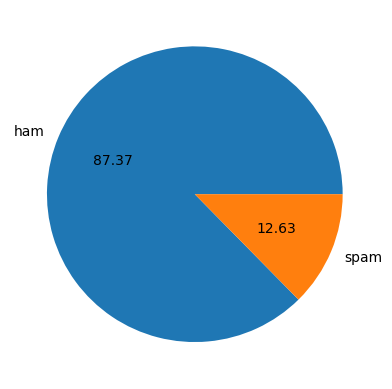

In [766]:
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [767]:
# data has imbalance

In [768]:
import nltk

In [769]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nabendumondal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [770]:
data['num_char']=data['text'].apply(len)
data.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [771]:
# no of words
data['num_Words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [772]:
data.head()

,target,text,num_char,num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [773]:
data['num_sent']=data['num_Words']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [774]:
data.head()

,target,text,num_char,num_Words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [775]:
data[['num_char','num_Words','num_sent']].describe()

,num_char,num_Words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,1.965564
std,58.236293,1.448541,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000
50%,60.000000,1.000000,1.000000
75%,117.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [776]:
# ham messages
data[data['target'] == 0][['num_char', 'num_Words', 'num_sent']].describe()

,num_char,num_Words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.820195,1.820195
std,56.358207,1.383657,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,1.000000
50%,52.000000,1.000000,1.000000
75%,90.000000,2.000000,2.000000
max,910.000000,38.000000,38.000000


In [777]:
# spam messages
data[data['target'] == 1][['num_char', 'num_Words', 'num_sent']].describe()


,num_char,num_Words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,2.970904
std,30.137753,1.488425,1.488425
min,13.000000,1.000000,1.000000
25%,132.000000,2.000000,2.000000
50%,149.000000,3.000000,3.000000
75%,157.000000,4.000000,4.000000
max,224.000000,9.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

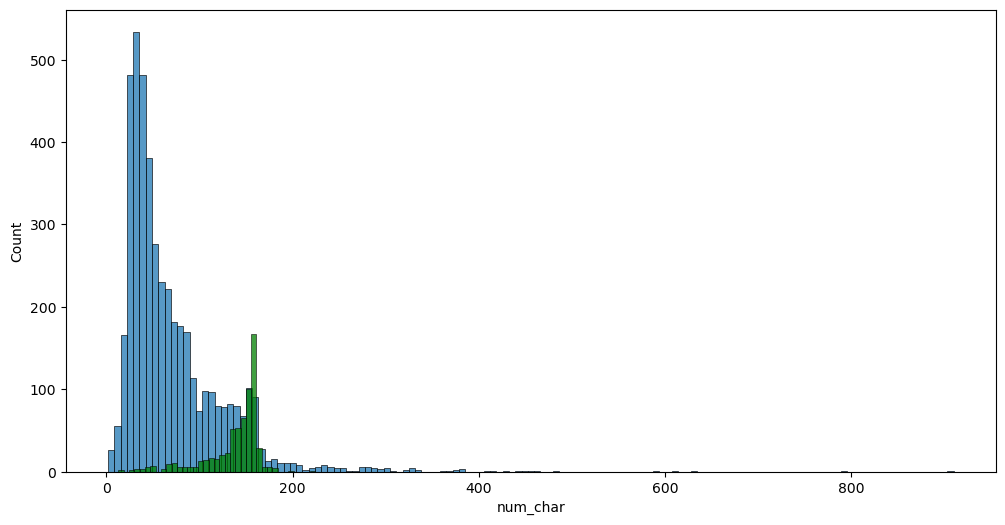

In [778]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] ==0]['num_char'])
sns.histplot(data[data['target'] ==1]['num_char'],color='green')


<Axes: xlabel='num_Words', ylabel='Count'>

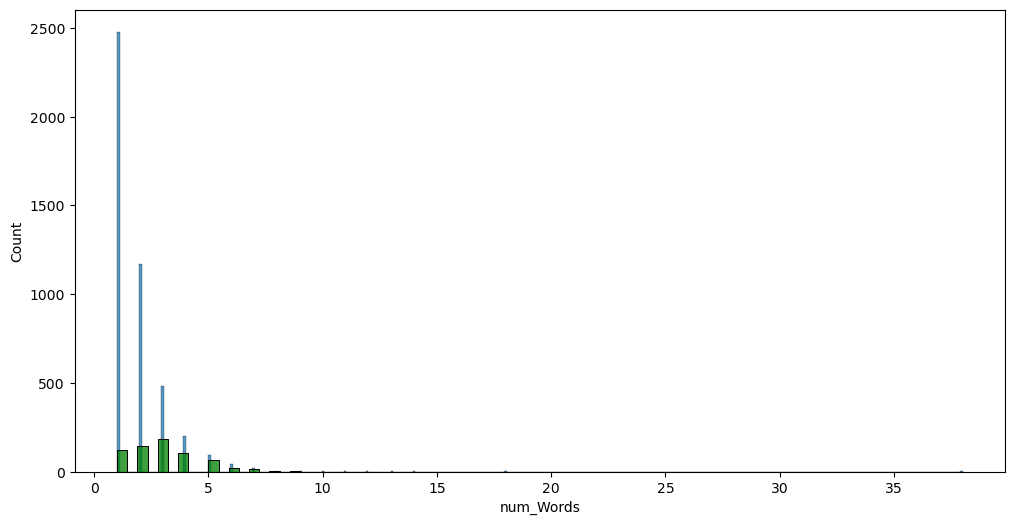

In [779]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] ==0]['num_Words'])
sns.histplot(data[data['target'] ==1]['num_Words'],color='green')


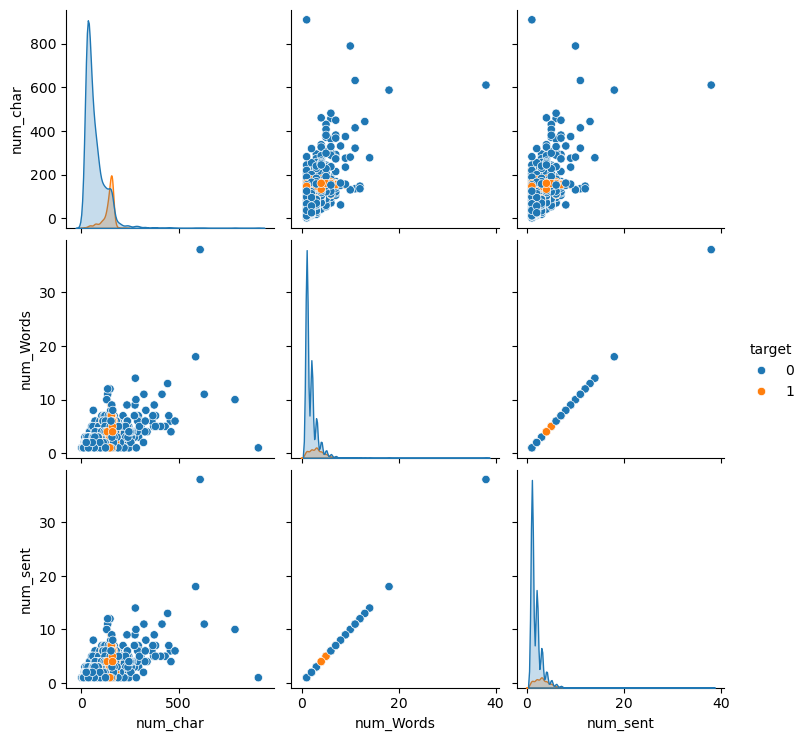

In [780]:
sns.pairplot(data,hue='target')
plt.show()

<Axes: >

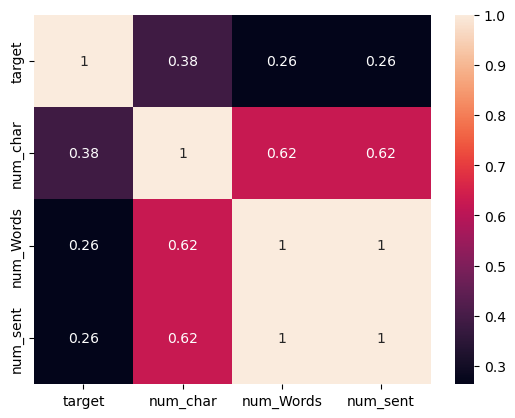

In [781]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

## Data Preprocessing

In [783]:
def tranform_text(text):
    text=text.lower()
    text=nltk.wordpunct_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return ' '.join(y)

In [784]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nabendumondal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [785]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [786]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [787]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()

In [788]:
data['transformed_text']=data['text'].apply(tranform_text)

In [789]:
data.head()

,target,text,num_char,num_Words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [790]:
!pip install wordcloud

In [791]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=12,background_color='black')

In [792]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=' '))

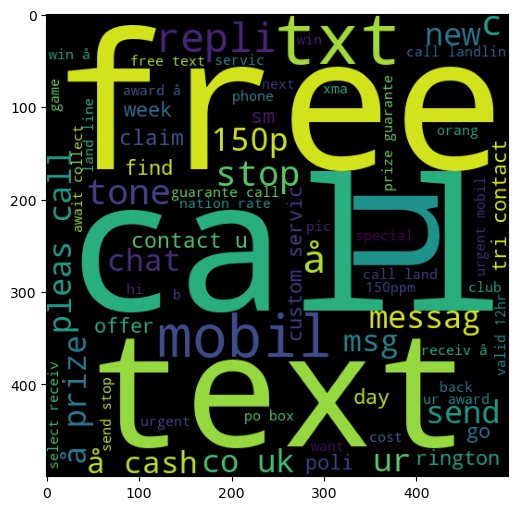

In [793]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [794]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=' '))

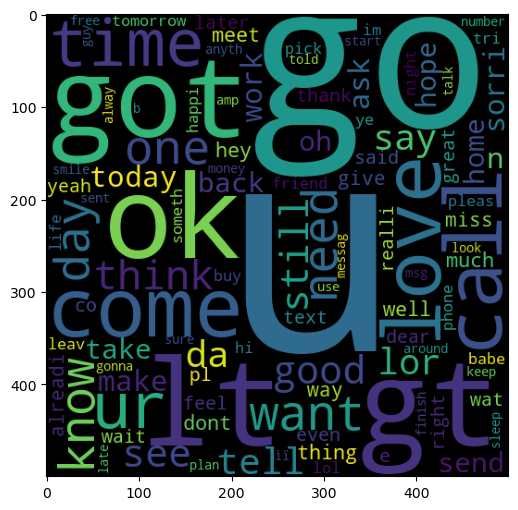

In [795]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [796]:
data.head()

,target,text,num_char,num_Words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah think goe usf live around though


In [797]:
spam_corpus = []
for message in data[data['target']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)
        

In [798]:
len(spam_corpus)

11993

In [799]:
!pip install counter

In [800]:
from collections import Counter


<Axes: ylabel='0'>

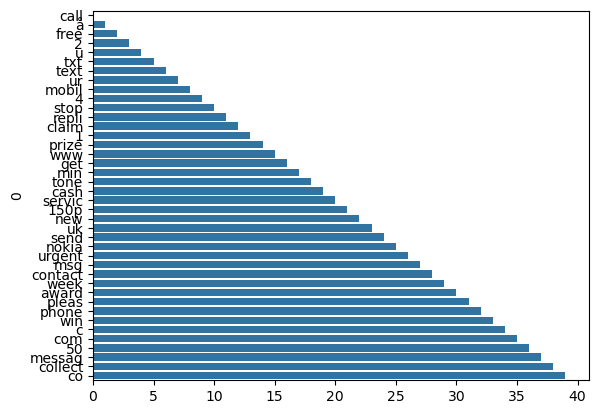

In [801]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(40))[0])

<Axes: ylabel='1'>

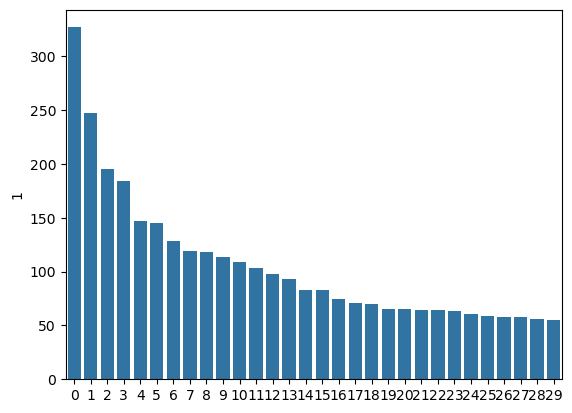

In [802]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])


In [803]:
ham_corpus = []
for message in data[data['target']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

<Axes: ylabel='1'>

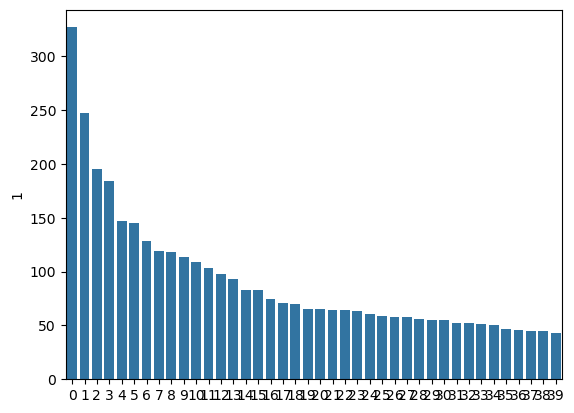

In [804]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(40))[1])

## Model Building

In [806]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [807]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [808]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [809]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [810]:
X.shape

(5169, 3000)

In [811]:
y = data['target'].values

In [812]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [813]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [814]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[788 108]
 [ 20 118]]
0.5221238938053098


In [815]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [816]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [817]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [818]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [819]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [820]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [821]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8627450980392157
For  LR
Accuracy -  0.960348162475822
Precision -  0.9619047619047619
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8636363636363636
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.968503937007874
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9489795918367347
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.952


In [822]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [823]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.976789,1.000000
0,SVC,0.975822,0.974790
8,ETC,0.981625,0.968504
5,RF,0.972921,0.966102
6,AdaBoost,0.972921,0.966102
4,LR,0.960348,0.961905
10,xgb,0.975822,0.952000
9,GBDT,0.951644,0.948980
7,BgC,0.959381,0.863636


In [824]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [825]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.976789
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.981625
4,RF,Accuracy,0.972921
5,AdaBoost,Accuracy,0.972921
6,LR,Accuracy,0.960348
7,xgb,Accuracy,0.975822
8,GBDT,Accuracy,0.951644
9,BgC,Accuracy,0.959381


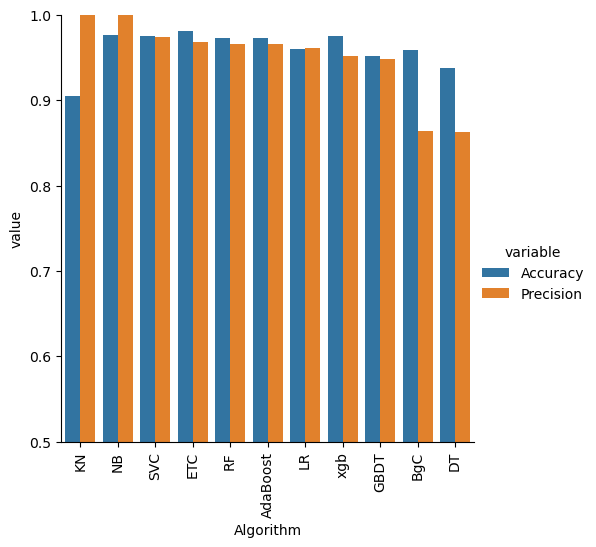

In [826]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [827]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [828]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [829]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [830]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [831]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [832]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000,0.976789,1.000000
2,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
3,ETC,0.981625,0.968504,0.981625,0.968504,0.981625,0.968504,0.981625,0.968504
4,RF,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102
5,AdaBoost,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102
6,LR,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905,0.960348,0.961905
7,xgb,0.975822,0.952000,0.975822,0.952000,0.975822,0.952000,0.975822,0.952000
8,GBDT,0.951644,0.948980,0.951644,0.948980,0.951644,0.948980,0.951644,0.948980
9,BgC,0.959381,0.863636,0.959381,0.863636,0.959381,0.863636,0.959381,0.863636


In [833]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [834]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [835]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [836]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [837]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [838]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.988394584139265
Precision 0.9921875


In [839]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))